In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
dataset= pd.read_csv('Salary_Data.csv')
X=dataset.iloc[:, :-1].values
Y=dataset.iloc[:, -1].values

In [4]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
dataset.shape

(30, 2)

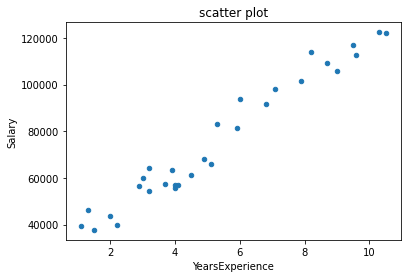

In [6]:
dataset.plot(kind='scatter',x='YearsExperience',y='Salary')
plt.title("scatter plot")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20,random_state= 0)

In [8]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train,Y_train)

LinearRegression()

In [9]:
Y_pred=slr.predict(X_test)
Y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [10]:
m=slr.coef_
print(m)

[9312.57512673]


In [11]:
c=slr.intercept_
print(c)

26780.09915062818


In [12]:
#Method1 
Salary=26780.09915062818+9312.57512673*1                     #y(years exp)=intercept+coeff*years exp like this we can give 1,2,3,4...
Salary

36092.67427735818

In [13]:
#Method2
X=[[1,]]
Salary=slr.predict(X)
Salary

array([36092.67427736])

In [14]:
#Method3
Y =m*X +c
print("The Minutes of{0} Units are:{1}".format(X[0],Y[0]))

The Minutes of[1] Units are:[36092.67427736]


1. MEAN SQUARE VALUE (MSE)

In [15]:
#manually
mse=np.mean((Y_test-Y_pred.ravel())**2)
print("Mean Squared Error=",mse)

Mean Squared Error= 12823412.298126549


In [16]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error=",mse)

Mean Squared Error= 12823412.298126549


2. ROOT MSE

In [17]:
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("Root Mean Squared Error=",rmse)

Root Mean Squared Error= 3580.979237321343


3. MEAN ABSOLUTE ERROR

In [18]:
from sklearn.metrics import mean_absolute_error
mape=np.mean(np.abs((Y_test-Y_pred.ravel())/Y_pred.ravel()))*100  #we need to do this manually
print("Mean Absolute Percentage Error of the model:",mape)

Mean Absolute Percentage Error of the model: 3.8304580782739484


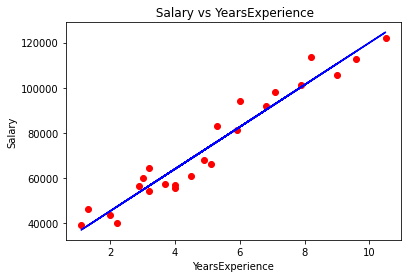

In [19]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,slr.predict(X_train),color='blue')
plt.title(' Salary vs YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

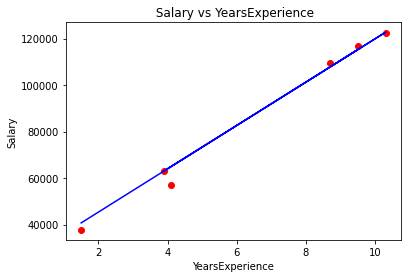

In [20]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,slr.predict(X_test),color='blue')
plt.title(' Salary vs YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()